<a href="https://colab.research.google.com/github/deepds/pytorch/blob/master/Pytorch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Загружаем датасет в Google Colab

In [0]:
from google.colab import drive # mount google drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
%ll

total 8
drwx------ 3 root 4096 Oct 11 10:28 gdrive/
drwxr-xr-x 1 root 4096 Aug 27 16:17 sample_data/


In [0]:
import os

os.chdir('/content/gdrive/My Drive/Colab Notebooks/Pytorch/data/flowers/')  #change dir

!mkdir flowers  #create a directory named train/

!unzip -q flowers-recognition.zip

mkdir: cannot create directory ‘flowers’: File exists
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
import os

os.chdir('/content/gdrive/My Drive/Colab Notebooks/Pytorch/data/flowers/') 

In [0]:
%cd flowers/daisy/

/content/gdrive/My Drive/Colab Notebooks/Pytorch/data/flowers/flowers/daisy


In [0]:
%ll

total 35531
-rw------- 1 root  26797 Sep 26 00:18 100080576_f52e8ee070_n.jpg
-rw------- 1 root 117247 Sep 26 00:18 10140303196_b88d3d6cec.jpg
-rw------- 1 root  36410 Sep 26 00:18 10172379554_b296050f82_n.jpg
-rw------- 1 root 102862 Sep 26 00:18 10172567486_2748826a8b.jpg
-rw------- 1 root  27419 Sep 26 00:18 10172636503_21bededa75_n.jpg
-rw------- 1 root 132803 Sep 26 00:18 102841525_bd6628ae3c.jpg
-rw------- 1 root  29941 Sep 26 00:18 10300722094_28fa978807_n.jpg
-rw------- 1 root 102618 Sep 26 00:18 1031799732_e7f4008c03.jpg
-rw------- 1 root  51688 Sep 26 00:18 10391248763_1d16681106_n.jpg
-rw------- 1 root  13946 Sep 26 00:18 10437754174_22ec990b77_m.jpg
-rw------- 1 root  13518 Sep 26 00:18 10437770546_8bb6f7bdd3_m.jpg
-rw------- 1 root  84219 Sep 26 00:18 10437929963_bc13eebe0c.jpg
-rw------- 1 root 172328 Sep 26 00:18 10466290366_cc72e33532.jpg
-rw------- 1 root 129584 Sep 26 00:18 10466558316_a7198b87e2.jpg
-rw------- 1 root  86878 Sep 26 00:18 10555749515_13a12a026e.jpg
-rw-

### 2. Визуализация примеров выборки


In [0]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def show_image(path):
  
    img = Image.open(path)
    img_arr = np.array(img)
    plt.figure(figsize=(5,5))
    plt.imshow(np.transpose(img_arr, (0, 1, 2)))

In [0]:
path = '/content/gdrive/My Drive/Colab Notebooks/Pytorch/data/flowers/flowers/daisy/9225336602_e6c392f941_n.jpg'

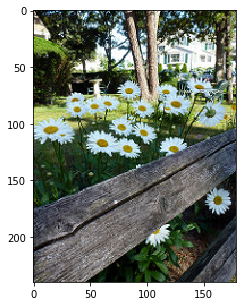

In [0]:
show_image(path)

### 3. Предобработка данных

Pytorch всегда получает на вход тензоры. Следовательно, для данных изображений мы также должны считывать их как тензоры размерности 3 и применять несколько этапов предварительной обработки

1. Resizing - сведем все изображения к квадратному размеру 64x64 для удобства вычислений

2. Нормализация - стандратизация (вычитаем среднее и делим на дисперсию каждого пикселя)


In [0]:
import torchvision.datasets as datasets 
import torchvision.transforms as transforms # преобразования в Pytorch
from torch.utils.data import DataLoader # загрузчик данных в Pytorch
from torchvision.utils import make_grid

In [0]:
transformations = transforms.Compose([transforms.RandomResizedCrop(64), 
                                      transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [0]:
path = "/content/gdrive/My Drive/Colab Notebooks/Pytorch/data/flowers/flowers"
img_dataset = datasets.ImageFolder(path, transform=transformations)

data_loader = DataLoader(img_dataset, batch_size=64)

items = iter(data_loader)

In [0]:
X, y = items.next()

In [0]:
print(X.shape, y.shape)

torch.Size([64, 3, 64, 64]) torch.Size([64])


In [0]:
def visualize_trans_imgs(image):
  
    np_image = image.numpy()
    plt.figure(figsize=(20,20))
    plt.imshow(np.transpose(np_image, (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


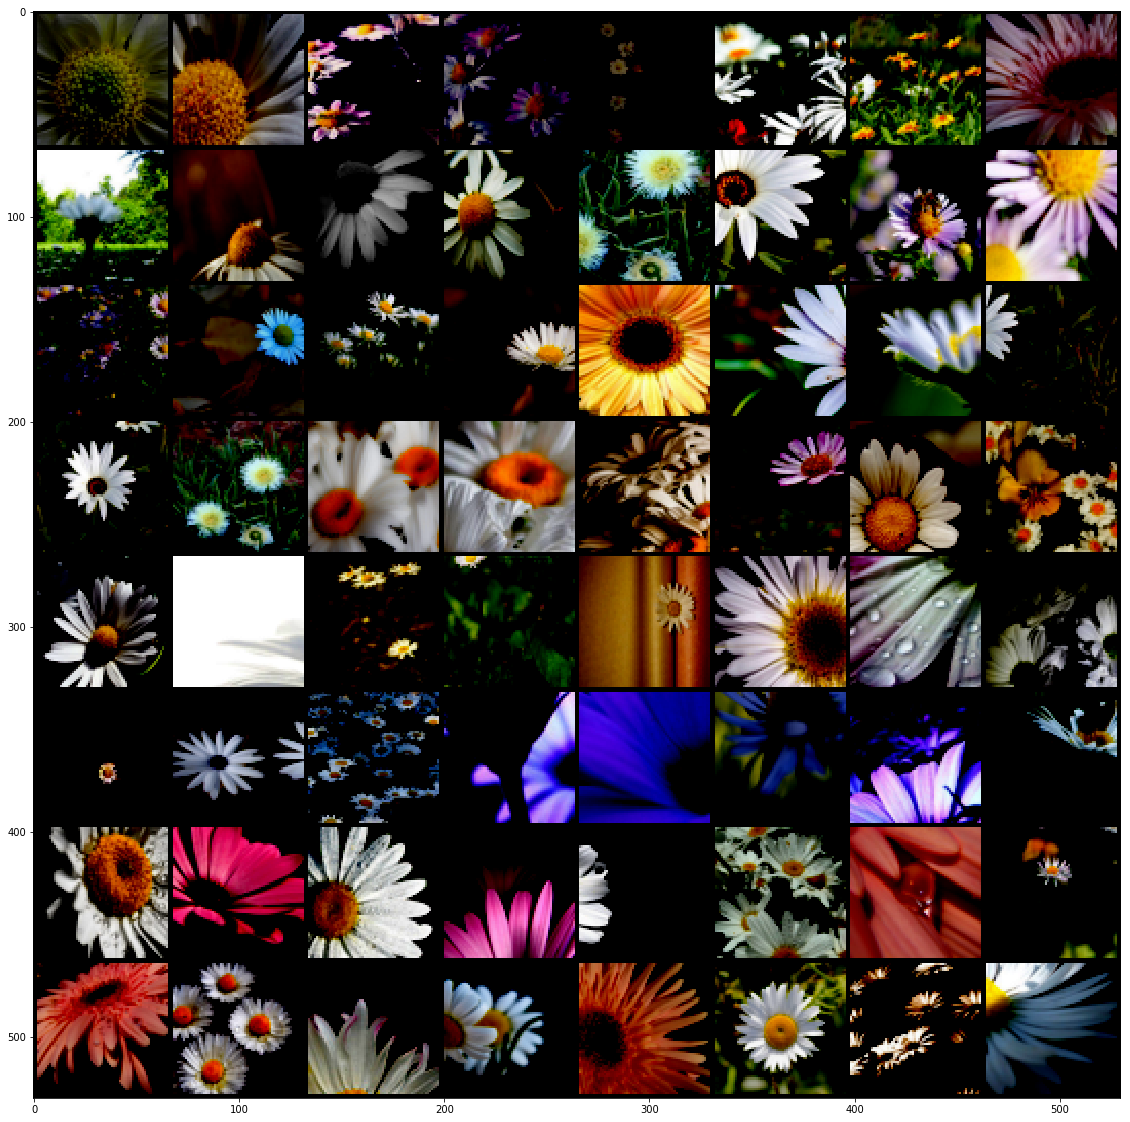

In [0]:
visualize_trans_imgs(make_grid(X)) # make_grid отличная функция в Pytorch, которая преобразует тензор в сетку матриц изображений

In [0]:
make_grid(X).shape

torch.Size([3, 530, 530])

In [0]:
img_dataset.class_to_idx

{'daisy': 0,
 'dandelion': 1,
 'flowers': 2,
 'rose': 3,
 'sunflower': 4,
 'tulip': 5}

### 4. Построение модели

Комбинация слоев свертки и субдискретизации (пулинга) для извлечени признаков из изображений

In [0]:
from torch.utils.data import random_split

train_size = int(0.8*len(img_dataset))
test_size = len(img_dataset) - train_size

train, test = random_split(img_dataset, [train_size, test_size])

In [0]:
train_dataset_loader = DataLoader(train, shuffle=True, batch_size=100) # загрузка данных в Dataloader

test_dataset_loader = DataLoader(test, shuffle=False, batch_size=100) # загрузка данных в Dataloader

__ __init__ ’определяет каждый слой и его параметры, тогда как функция« forward » выполняет вызовы виде последовательности слоев.

In [0]:
import torch
import torch.nn as nn

class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
       
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.tanh2 = nn.Tanh()
        
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.elu3 = nn.ELU()
       
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
      
        out = self.fc1(x)
        out = self.relu1(out)
        
        out = self.fc2(out)
        out = self.tanh2(out)
        
        out = self.fc3(out)
        out = self.elu3(out)
        
        out = self.fc4(out)
        return out

In [0]:
input_dim = 64*64
hidden_dim = 150
output_dim = 6

model = ANNModel(input_dim, hidden_dim, output_dim)

error = nn.CrossEntropyLoss()

learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [0]:
import torch.nn as nn

class SimpleCNNModel(nn.Module):
    
    def __init__(self, num_classes=6):
        super(SimpleCNNModel,self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3,stride=1, padding=1)
        self.relu1 = nn.ReLU()
        
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
        self.lf = nn.Linear(in_features=32 * 32 * 24, out_features=num_classes)
    
    def forward(self, input):
        output = self.conv1(input)
        output = self.relu1(output)
        
        output = self.maxpool1(output)
        
        output = self.conv2(output)
        output = self.relu2(output)
        
        output = output.view(-1, 32 * 32 * 24)

        output = self.lf(output)

        return output

In [0]:
model = SimpleCNNModel()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

parameters = list(model.parameters())
optimizer = torch.optim.Adam(model.parameters())

ce_loss = nn.CrossEntropyLoss()

In [0]:
def train_model(n_epoch):
    for epoch in range(n_epoch):
        model.train()
        for i, (images, labels) in enumerate(train_dataset_loader):
            optimizer.zero_grad()
            outputs = model(images)
            loss = ce_loss(outputs, labels)
            loss.backward()
            optimizer.step()

In [0]:
train_model(1)

In [0]:
epochs = 5
for epoch in range(epochs):
    train_loss = 0
    val_loss = 0
    accuracy = 0
    
    # Training the model
    model.train()
    counter = 0
    for inputs, labels in train_dataset_loader:
        # Перенос тензоров на GPU
        inputs, labels = inputs.to(device), labels.to(device)
        # Обнуляем оптимизатор
        optimizer.zero_grad()
        # Прямой проход 
        output = model.forward(inputs)
        # Вычисление функции потерь
        loss = ce_loss(output, labels)
        # Вычисление градиентов (backpropagation)
        loss.backward()
        # Обновление параметров на основе градиентов
        optimizer.step()
        # Добавление функции потерь в историю (статистика)
        train_loss += loss.item()*inputs.size(0)
        
        # Выводим на экран прогресс обучения
        counter += 1
        print("train batch: ", counter, "/", len(train_dataset_loader))
        
    # Оценка качества модели (режим evaluation)
    model.eval()
    counter = 0
    # Команда torch не вычислять градиенты
    with torch.no_grad():
        for inputs, labels in test_dataset_loader:
            # Перенос тензоров на GPU
            inputs, labels = inputs.to(device), labels.to(device)
            # Прямой проход (forward pass)
            output = model.forward(inputs)
            # Вычисление функции потерь на валидации
            valloss = ce_loss(output, labels)
            # Добавление функции потерь в статистику
            val_loss += valloss.item()*inputs.size(0)
            
            _, prediction = torch.max(output.data, 1)
            accuracy += torch.sum(prediction == labels.data).item()
            
            # Выводим на экран прогресс валидации
            counter += 1
            print("validation batch: ", counter, "/", len(test_dataset_loader))
    
    # Get the average loss for the entire epoch
    train_loss = train_loss/len(train_dataset_loader.dataset)
    valid_loss = val_loss/len(test_dataset_loader.dataset)
    # Print out the information
    print('Accuracy: ', accuracy/len(test_dataset_loader))
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, train_loss, valid_loss))

train batch:  1 / 70
train batch:  2 / 70
train batch:  3 / 70
train batch:  4 / 70
train batch:  5 / 70
train batch:  6 / 70
train batch:  7 / 70
train batch:  8 / 70
train batch:  9 / 70
train batch:  10 / 70
train batch:  11 / 70
train batch:  12 / 70
train batch:  13 / 70
train batch:  14 / 70
train batch:  15 / 70
train batch:  16 / 70
train batch:  17 / 70
train batch:  18 / 70
train batch:  19 / 70
train batch:  20 / 70
train batch:  21 / 70
train batch:  22 / 70
train batch:  23 / 70
train batch:  24 / 70
train batch:  25 / 70
train batch:  26 / 70
train batch:  27 / 70
train batch:  28 / 70
train batch:  29 / 70
train batch:  30 / 70
train batch:  31 / 70
train batch:  32 / 70
train batch:  33 / 70
train batch:  34 / 70
train batch:  35 / 70
train batch:  36 / 70
train batch:  37 / 70
train batch:  38 / 70
train batch:  39 / 70
train batch:  40 / 70
train batch:  41 / 70
train batch:  42 / 70
train batch:  43 / 70
train batch:  44 / 70
train batch:  45 / 70
train batch:  46 / 

In [0]:
import torch

model.eval()
test_accuracy = 0
for k, (test_images, test_labels) in enumerate(test_dataset_loader):

    test_outputs = model(test_images)
    _, prediction = torch.max(test_outputs.data, 1)
    test_accuracy += torch.sum(prediction == test_labels.data).item()

test_accuracy = test_accuracy / len(test_dataset)

In [0]:
path = '/content/gdrive/My Drive/Colab Notebooks/Pytorch/data/flowers/flowers/'

test_image = Image.open(path+"dandelion/13920113_f03e867ea7_m.jpg")
test_image_tensor = transformations(test_image).float().to(device)

In [0]:
test_image_tensor = test_image_tensor.unsqueeze_(0)
output = model(test_image_tensor)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-64-a2f6a0895d16>", line 2, in <module>
    output = model(test_image_tensor)
  File "/usr/local/lib/python3.6/dist-packages/torch/nn/modules/module.py", line 547, in __call__
    result = self.forward(*input, **kwargs)
  File "<ipython-input-24-f0fc83535d89>", line 19, in forward
    output = self.conv1(input)
  File "/usr/local/lib/python3.6/dist-packages/torch/nn/modules/module.py", line 547, in __call__
    result = self.forward(*input, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/torch/nn/modules/conv.py", line 343, in forward
    return self.conv2d_forward(input, self.weight)
  File "/usr/local/lib/python3.6/dist-packages/torch/nn/modules/conv.py", line 340, in conv2d_forward
    self.padding, self.dilation, self.groups)
RuntimeError: Expected 4-dimensiona

RuntimeError: ignored

In [0]:

class_index = output.data.numpy().argmax()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-62-b2a1cd8a5768>", line 3, in <module>
    class_index = output.data.numpy().argmax()
TypeError: can't convert CUDA tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_contex

TypeError: ignored